# Feed Forward ANN 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import sklearn
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

In [2]:
Data=pd.read_csv('D:\JupyterNotebook\GitHub\IoT-BotNet-detection-on-IoT23-dataset\IoT23\Data Preparation\preprocessed_iot23.csv')

In [3]:
Data.head()

,Unnamed: 0,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,proto,conn_state,history,label
0,0,0.000003,0.0,0.0,0.0,2.0,80.0,0.0,0.0,1,5,16,POHS
1,1,0.000002,0.0,0.0,0.0,2.0,80.0,0.0,0.0,1,5,16,POHS
2,2,0.000002,0.0,0.0,0.0,2.0,80.0,0.0,0.0,1,5,16,POHS
3,3,0.000002,0.0,0.0,0.0,2.0,80.0,0.0,0.0,1,5,16,POHS
4,4,0.000002,0.0,0.0,0.0,2.0,80.0,0.0,0.0,1,5,16,POHS


In [4]:
Data.tail()

,Unnamed: 0,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,proto,conn_state,history,label
1244126,1244671,0.0,0.0,0.0,0.0,1.0,40.0,0.0,0.0,1,5,16,POHS
1244127,1244672,0.0,0.0,0.0,0.0,1.0,40.0,0.0,0.0,1,5,16,POHS
1244128,1244673,0.0,0.0,0.0,0.0,1.0,40.0,0.0,0.0,1,5,16,POHS
1244129,1244674,0.0,0.0,0.0,0.0,1.0,40.0,0.0,0.0,1,5,16,POHS
1244130,1244675,0.0,0.0,0.0,0.0,1.0,40.0,0.0,0.0,1,5,16,POHS


In [5]:
Data.shape

(1244131, 13)

In [6]:
Data.describe()

,Unnamed: 0,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,proto,conn_state,history
count,1.244131e+06,1.244131e+06,1.244131e+06,1.244131e+06,1.244131e+06,1.244131e+06,1.244131e+06,1.244131e+06,1.244131e+06,1.244131e+06,1.244131e+06,1.244131e+06
mean,6.223079e+05,4.382011e-01,3.162748e+03,1.228624e+01,5.353777e-02,2.063864e+02,8.971911e+03,3.341047e-02,1.382442e+01,1.011863e+00,4.577432e+00,1.471021e+01
std,3.593211e+05,5.560016e+01,1.847804e+06,1.046620e+04,1.525009e+01,7.791396e+04,3.070481e+06,7.342897e+00,1.083993e+04,1.103718e-01,1.502551e+00,4.651819e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.110905e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,1.600000e+01
50%,6.222540e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,1.600000e+01
75%,9.334275e+05,2.000000e-06,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,8.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,1.600000e+01
max,1.244675e+06,4.897682e+04,1.744830e+09,1.166102e+07,5.792000e+03,6.602735e+07,1.914793e+09,8.055000e+03,1.207699e+07,2.000000e+00,1.100000e+01,7.000000e+01


In [7]:
print(Data.columns)

Index(['Unnamed: 0', 'duration', 'orig_bytes', 'resp_bytes', 'missed_bytes',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto',
       'conn_state', 'history', 'label'],
      dtype='object')


In [8]:
Data.drop("Unnamed: 0",inplace=True,axis=1)

In [9]:
print(Data.columns)

Index(['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts',
       'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto', 'conn_state',
       'history', 'label'],
      dtype='object')


In [10]:
Data.shape

(1244131, 12)

In [11]:
X=Data.values[:,0:11]
Ym=Data.values[:,11]
print(X.shape)
print(Ym.shape)

(1244131, 11)
(1244131,)


In [12]:
#Y=Y.reshape(Y.shape[0],1)

In [13]:
np.unique(Ym)

array(['Benign', 'C&C', 'DDoS', 'Okiru', 'POHS'], dtype=object)

In [14]:
np.unique(Ym)

array(['Benign', 'C&C', 'DDoS', 'Okiru', 'POHS'], dtype=object)

In [15]:
print(X)

[[3e-06 0.0 0.0 ... 1 5 16]
 [2e-06 0.0 0.0 ... 1 5 16]
 [2e-06 0.0 0.0 ... 1 5 16]
 ...
 [0.0 0.0 0.0 ... 1 5 16]
 [0.0 0.0 0.0 ... 1 5 16]
 [0.0 0.0 0.0 ... 1 5 16]]


In [16]:
X = np.asarray(X).astype(np.float32)

In [17]:
Y = pd.get_dummies(Ym).values

In [18]:
Y.shape

(1244131, 5)

In [19]:
x_scaler=MinMaxScaler()

In [20]:
x_scaler.fit(X)

MinMaxScaler()

In [21]:
Normalized_x=x_scaler.transform(X)

In [22]:
Normalized_x

array([[6.1253468e-11, 0.0000000e+00, 0.0000000e+00, ..., 5.0000000e-01,
        4.5454547e-01, 2.2857143e-01],
       [4.0835644e-11, 0.0000000e+00, 0.0000000e+00, ..., 5.0000000e-01,
        4.5454547e-01, 2.2857143e-01],
       [4.0835644e-11, 0.0000000e+00, 0.0000000e+00, ..., 5.0000000e-01,
        4.5454547e-01, 2.2857143e-01],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.0000000e-01,
        4.5454547e-01, 2.2857143e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.0000000e-01,
        4.5454547e-01, 2.2857143e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.0000000e-01,
        4.5454547e-01, 2.2857143e-01]], dtype=float32)

In [23]:
Normalized_x.shape

(1244131, 11)

In [24]:
x_scaler.fit(Y)

MinMaxScaler()

In [25]:
normalized_y = x_scaler.transform(Y)

In [26]:
normalized_y

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

We are first developing a feed forward network for binary classification

In [27]:
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense,Conv1D,LSTM,Flatten
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.callbacks import EarlyStopping

In [28]:
from keras import Sequential

In [30]:
X_train, X_test, y_train, y_test = train_test_split(Normalized_x, normalized_y, test_size=0.2, random_state=10)

# Model Creation

In [33]:
model = Sequential()

In [34]:
model.add(Dense(1000, activation='relu',input_dim=11))
model.add(Dense(500, activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(5, activation='softmax'))
opt=Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              12000     
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 250)               125250    
                                                                 
 dense_3 (Dense)             (None, 5)                 1255      
                                                                 
Total params: 639,005
Trainable params: 639,005
Non-trainable params: 0
_________________________________________________________________


In [36]:
import time

In [37]:
start = time.time()
print('program start...')
print()

history = model.fit(X_train, y_train, batch_size=128,epochs = 50,  validation_data=(X_test,y_test),verbose=1)

print()
end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...

Epoch 1/50
7776/7776 [==============================] - 64s 8ms/step - loss: 11921.9805 - accuracy: 0.6305 - val_loss: 96485.5391 - val_accuracy: 0.6649
Epoch 2/50
7776/7776 [==============================] - 66s 9ms/step - loss: 60274.1445 - accuracy: 0.6574 - val_loss: 777886.3125 - val_accuracy: 0.7279
Epoch 3/50
7776/7776 [==============================] - 71s 9ms/step - loss: 62339.8711 - accuracy: 0.6540 - val_loss: 1098537.8750 - val_accuracy: 0.6886
Epoch 4/50
7776/7776 [==============================] - 66s 9ms/step - loss: 210814.1875 - accuracy: 0.6687 - val_loss: 1418835.5000 - val_accuracy: 0.7296
Epoch 5/50
7776/7776 [==============================] - 65s 8ms/step - loss: 46742.4570 - accuracy: 0.6621 - val_loss: 6258711.5000 - val_accuracy: 0.6589
Epoch 6/50
7776/7776 [==============================] - 66s 8ms/step - loss: 341956.2500 - accuracy: 0.6607 - val_loss: 1006571.0625 - val_accuracy: 0.6586
Epoch 7/50
7776/7776 [==============================]

KeyboardInterrupt: 

<<<<<=====the reason for huge loss value here is the learning rate and complexity of the model....======>>

In [79]:
file_name = 'FFNN_IoT23_first_model'
model.save('file_name')

INFO:tensorflow:Assets written to: file_name\assets


In [49]:
import matplotlib.pyplot as plt

In [44]:
model_new = Sequential()

In [45]:
model_new.add(Dense(512, activation='relu',input_dim=11))
model_new.add(Dense(256, activation='relu'))
model_new.add(Dense(128,activation='relu'))
model_new.add(Dense(5, activation='softmax'))
opt=Adam(learning_rate=0.0001)

model_new.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

In [46]:
model_new.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               6144      
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dense_19 (Dense)            (None, 5)                 645       
                                                                 
Total params: 171,013
Trainable params: 171,013
Non-trainable params: 0
_________________________________________________________________


In [47]:
start = time.time()
print('program start...')
print()

history = model_new.fit(X_train, y_train, batch_size=256,epochs = 50,  validation_data=(X_test,y_test),verbose=1)

print()
end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...

Epoch 1/50
3888/3888 [==============================] - 15s 4ms/step - loss: 156.3961 - accuracy: 0.6244 - val_loss: 135.1438 - val_accuracy: 0.6876
Epoch 2/50
3888/3888 [==============================] - 20s 5ms/step - loss: 241.5687 - accuracy: 0.6516 - val_loss: 513.2184 - val_accuracy: 0.6863
Epoch 3/50
3888/3888 [==============================] - 19s 5ms/step - loss: 144.8248 - accuracy: 0.6831 - val_loss: 508.9613 - val_accuracy: 0.7298
Epoch 4/50
3888/3888 [==============================] - 19s 5ms/step - loss: 954.0712 - accuracy: 0.7041 - val_loss: 1663.2808 - val_accuracy: 0.6359
Epoch 5/50
3888/3888 [==============================] - 19s 5ms/step - loss: 48.5089 - accuracy: 0.7232 - val_loss: 659.1236 - val_accuracy: 0.7293
Epoch 6/50
3888/3888 [==============================] - 18s 5ms/step - loss: 54.2244 - accuracy: 0.7135 - val_loss: 758.7767 - val_accuracy: 0.7293
Epoch 7/50
3888/3888 [==============================] - 18s 5ms/step - loss: 1267.3540 - 

In [48]:
_, acc= model_new.evaluate(X_test, y_test)
print("Accuracy =", (acc* 100.0), "%")

7776/7776 [==============================] - 11s 1ms/step - loss: 10574.3447 - accuracy: 0.7306
Accuracy = 73.05718660354614 %


In [87]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs=range(1, len(loss_train) +1)

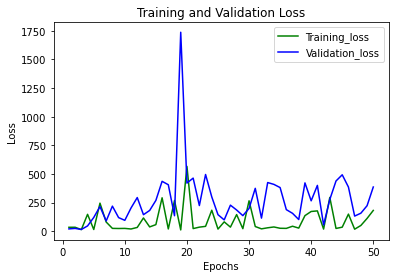

In [88]:
plt.plot(epochs, loss_train, 'g', label='Training_loss')
plt.plot(epochs, loss_val, 'b', label='Validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(r'C:\Users\DELL\Pictures\TonIoT Images\first_iot_23_model.tiff', bbox_inches='tight', dpi=500)
plt.show()

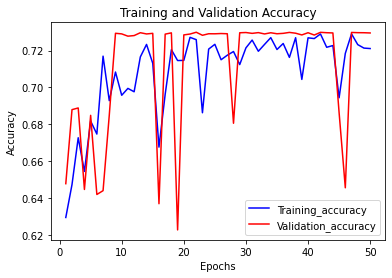

In [89]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training_accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(r'C:\Users\DELL\Pictures\TonIoT Images\first_io23_model_acc.tiff', bbox_inches='tight', dpi=500)
plt.show()

New model with l2 regularization

In [54]:
from keras.regularizers import l2

In [70]:
l2_model=Sequential()

In [71]:
l2_model.add(Dense(512, activation='relu',input_dim=11))
l2_model.add(Dense(256, activation='relu',kernel_regularizer=l2(0.001)))
l2_model.add(Dense(5, activation='softmax'))
opt=Adam(learning_rate=0.00001)

l2_model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

In [72]:
l2_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 512)               6144      
                                                                 
 dense_32 (Dense)            (None, 256)               131328    
                                                                 
 dense_33 (Dense)            (None, 5)                 1285      
                                                                 
Total params: 138,757
Trainable params: 138,757
Non-trainable params: 0
_________________________________________________________________


In [73]:
start = time.time()
print('program start...')
print()

history = l2_model.fit(X_train, y_train, batch_size=128,epochs = 30,  validation_data=(X_test,y_test),verbose=1)

print()
end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...

Epoch 1/30
7776/7776 [==============================] - 21s 3ms/step - loss: 23.3269 - accuracy: 0.6183 - val_loss: 8.5694 - val_accuracy: 0.6456
Epoch 2/30
7776/7776 [==============================] - 24s 3ms/step - loss: 34.5521 - accuracy: 0.6479 - val_loss: 24.9769 - val_accuracy: 0.6459
Epoch 3/30
7776/7776 [==============================] - 26s 3ms/step - loss: 115.0784 - accuracy: 0.6558 - val_loss: 53.6490 - val_accuracy: 0.6863
Epoch 4/30
7776/7776 [==============================] - 25s 3ms/step - loss: 3.4818 - accuracy: 0.7196 - val_loss: 63.8579 - val_accuracy: 0.6893
Epoch 5/30
7776/7776 [==============================] - 25s 3ms/step - loss: 29.4297 - accuracy: 0.7178 - val_loss: 146.7720 - val_accuracy: 0.6895
Epoch 6/30
7776/7776 [==============================] - 27s 4ms/step - loss: 23.6507 - accuracy: 0.7135 - val_loss: 90.3454 - val_accuracy: 0.7296
Epoch 7/30
7776/7776 [==============================] - 27s 4ms/step - loss: 5.9105 - accuracy: 0.71

In [74]:
_, acc= l2_model.evaluate(X_test, y_test)
print("Accuracy =", (acc* 100.0), "%")

7776/7776 [==============================] - 10s 1ms/step - loss: 44.2534 - accuracy: 0.7302
Accuracy = 73.01779985427856 %


In [75]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs=range(1, len(loss_train) +1)

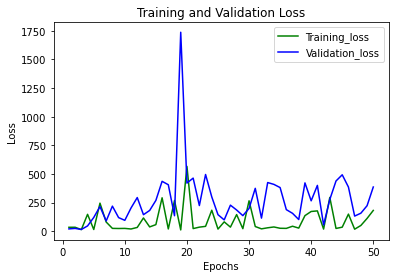

In [90]:
plt.plot(epochs, loss_train, 'g', label='Training_loss')
plt.plot(epochs, loss_val, 'b', label='Validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(r'C:\Users\DELL\Pictures\TonIoT Images\l2_model_loss.tiff', bbox_inches='tight', dpi=500)
plt.show()
plt.show()

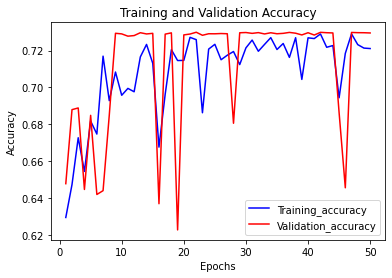

In [91]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training_accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(r'C:\Users\DELL\Pictures\TonIoT Images\l2_model_acc.tiff', bbox_inches='tight', dpi=500)
plt.show()

Last model before sleep.. its 4 AM already! 

In [78]:
a4am_model=Sequential()

In [79]:
a4am_model.add(Dense(1024, activation='relu',input_dim=11))
a4am_model.add(Dense(512, activation='relu',kernel_regularizer=l2(0.01)))
a4am_model.add(Dense(128, activation='relu',kernel_regularizer=l2(0.01)))
a4am_model.add(Dense(5, activation='softmax'))
opt=Adam(learning_rate=0.00001)

a4am_model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

In [80]:
a4am_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 1024)              12288     
                                                                 
 dense_35 (Dense)            (None, 512)               524800    
                                                                 
 dense_36 (Dense)            (None, 128)               65664     
                                                                 
 dense_37 (Dense)            (None, 5)                 645       
                                                                 
Total params: 603,397
Trainable params: 603,397
Non-trainable params: 0
_________________________________________________________________


In [81]:
start = time.time()
print('program start...')
print()

history = a4am_model.fit(X_train, y_train, batch_size=128,epochs =50,  validation_data=(X_test,y_test),verbose=1)

print()
end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...

Epoch 1/50
7776/7776 [==============================] - 87s 11ms/step - loss: 34.1536 - accuracy: 0.6295 - val_loss: 20.2268 - val_accuracy: 0.6478
Epoch 2/50
7776/7776 [==============================] - 87s 11ms/step - loss: 34.4099 - accuracy: 0.6474 - val_loss: 24.3252 - val_accuracy: 0.6880
Epoch 3/50
7776/7776 [==============================] - 91s 12ms/step - loss: 14.0271 - accuracy: 0.6727 - val_loss: 15.1199 - val_accuracy: 0.6889
Epoch 4/50
7776/7776 [==============================] - 89s 11ms/step - loss: 147.3138 - accuracy: 0.6545 - val_loss: 46.0097 - val_accuracy: 0.6447
Epoch 5/50
7776/7776 [==============================] - 96s 12ms/step - loss: 14.9055 - accuracy: 0.6818 - val_loss: 120.1362 - val_accuracy: 0.6849
Epoch 6/50
7776/7776 [==============================] - 89s 11ms/step - loss: 245.0915 - accuracy: 0.6747 - val_loss: 215.1995 - val_accuracy: 0.6420
Epoch 7/50
7776/7776 [==============================] - 89s 11ms/step - loss: 80.0511 - ac

In [82]:
_, acc= a4am_model.evaluate(X_test, y_test)
print("Accuracy =", (acc* 100.0), "%")

7776/7776 [==============================] - 20s 3ms/step - loss: 386.1124 - accuracy: 0.7296
Accuracy = 72.95711636543274 %


In [85]:
import matplotlib.pyplot as plt

In [86]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs=range(1, len(loss_train) +1)

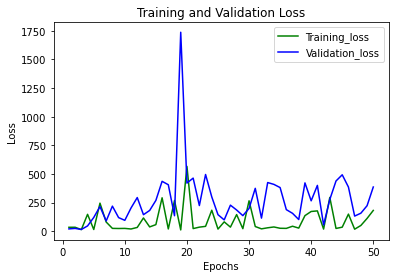

In [92]:
plt.plot(epochs, loss_train, 'g', label='Training_loss')
plt.plot(epochs, loss_val, 'b', label='Validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(r'C:\Users\DELL\Pictures\TonIoT Images\4am_model_loss.tiff', bbox_inches='tight', dpi=500)
plt.show()

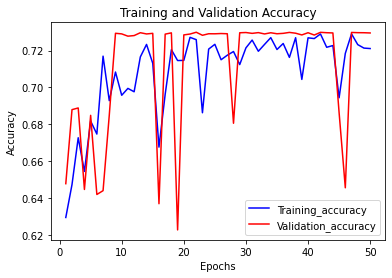

In [93]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training_accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(r'C:\Users\DELL\Pictures\TonIoT Images\4am_model_acc.tiff', bbox_inches='tight', dpi=500)
plt.show()

==============STANDBY MODEL============

In [94]:
model_s tandby = Sequential()

In [95]:
model_standby.add(Dense(2000, activation='relu',input_dim=11))
model_standby.add(Dense(1500, activation='relu'))
model_standby.add(Dropout(0.2))
model_standby.add(Dense(800,activation='relu'))
model_standby.add(Dropout(0.2))
model_standby.add(Dense(400,activation='relu'))
model_standby.add(Dropout(0.2))
model_standby.add(Dense(150,activation='relu'))
model_standby.add(Dropout(0.2))
model_standby.add(Dense(5, activation='softmax'))
model_standby.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [96]:
model_standby.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 2000)              24000     
                                                                 
 dense_39 (Dense)            (None, 1500)              3001500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_40 (Dense)            (None, 800)               1200800   
                                                                 
 dropout_1 (Dropout)         (None, 800)               0         
                                                                 
 dense_41 (Dense)            (None, 400)               320400    
                                                                 
 dropout_2 (Dropout)         (None, 400)              

Lets start and sleep..! see u later ! 

In [98]:
start = time.time()
print('program start...')
print()

history = model_standby.fit(X_train, y_train, batch_size=256,epochs = 100,  validation_data=(X_test,y_test),verbose=1)

print()
end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...

Epoch 1/100
3888/3888 [==============================] - 312s 80ms/step - loss: 1822.4122 - accuracy: 0.6811 - val_loss: 0.6766 - val_accuracy: 0.6802
Epoch 2/100
3888/3888 [==============================] - 315s 81ms/step - loss: 12.9271 - accuracy: 0.6749 - val_loss: 0.6734 - val_accuracy: 0.6803
Epoch 3/100
3888/3888 [==============================] - 298s 77ms/step - loss: 736.8888 - accuracy: 0.7052 - val_loss: 5063.0762 - val_accuracy: 0.7290
Epoch 4/100
3888/3888 [==============================] - 293s 75ms/step - loss: 2628.1404 - accuracy: 0.7200 - val_loss: 0.6021 - val_accuracy: 0.7269
Epoch 5/100
3888/3888 [==============================] - 293s 75ms/step - loss: 107.9220 - accuracy: 0.7238 - val_loss: 0.5941 - val_accuracy: 0.7275
Epoch 6/100
3888/3888 [==============================] - 298s 77ms/step - loss: 0.6899 - accuracy: 0.7258 - val_loss: 0.5890 - val_accuracy: 0.7290
Epoch 7/100
3888/3888 [==============================] - 292s 75ms/step - loss: 

wooh... its 5:14 PM ! and this model just completed  its mission now... took a long time..! 

In [99]:
_, acc= model_standby.evaluate(X_test, y_test)
print("Accuracy =", (acc* 100.0), "%")

7776/7776 [==============================] - 59s 8ms/step - loss: 0.6111 - accuracy: 0.7295
Accuracy = 72.95028567314148 %


In [100]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs=range(1, len(loss_train) +1)

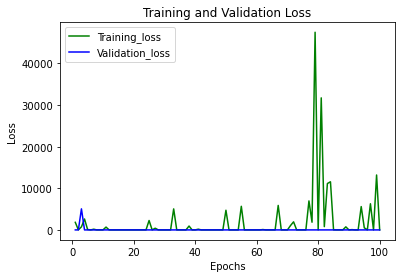

In [101]:
plt.plot(epochs, loss_train, 'g', label='Training_loss')
plt.plot(epochs, loss_val, 'b', label='Validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(r'C:\Users\DELL\Pictures\TonIoT Images\standby_model_loss.tiff', bbox_inches='tight', dpi=500)
plt.show()

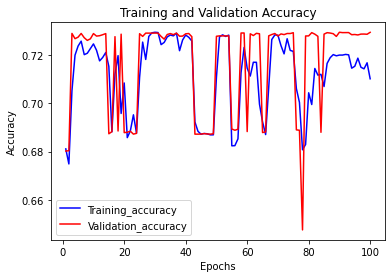

In [102]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training_accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(r'C:\Users\DELL\Pictures\TonIoT Images\standby_model_acc.tiff', bbox_inches='tight', dpi=500)
plt.show()

Previous model with learning rate! 

In [ ]:
============================Changing activation function to Tanh=======================

In [31]:
_model=Sequential()

In [32]:
_model.add(Dense(76,activation='tanh',input_shape=(11,)))
_model.add(Dense(38,activation='tanh'))
_model.add(Dense(5,activation='softmax'))
opt=Adam(learning_rate=0.001)

In [33]:
_model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=opt)

In [35]:
import time 

In [36]:
start = time.time()
print('program start...')
print()

history = _model.fit(X_train, y_train, batch_size=256,epochs =100,  validation_data=(X_test,y_test),verbose=1)

print()
end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...

Epoch 1/100
3888/3888 [==============================] - 7s 2ms/step - loss: 0.9434 - accuracy: 0.6467 - val_loss: 0.9307 - val_accuracy: 0.6488
Epoch 2/100
3888/3888 [==============================] - 6s 2ms/step - loss: 0.9313 - accuracy: 0.6499 - val_loss: 0.9298 - val_accuracy: 0.6490
Epoch 3/100
3888/3888 [==============================] - 6s 2ms/step - loss: 0.9296 - accuracy: 0.6500 - val_loss: 0.9292 - val_accuracy: 0.6490
Epoch 4/100
3888/3888 [==============================] - 6s 2ms/step - loss: 0.9288 - accuracy: 0.6502 - val_loss: 0.9278 - val_accuracy: 0.6492
Epoch 5/100
3888/3888 [==============================] - 6s 2ms/step - loss: 0.9284 - accuracy: 0.6502 - val_loss: 0.9286 - val_accuracy: 0.6492
Epoch 6/100
3888/3888 [==============================] - 7s 2ms/step - loss: 0.9281 - accuracy: 0.6503 - val_loss: 0.9281 - val_accuracy: 0.6492
Epoch 7/100
3888/3888 [==============================] - 6s 2ms/step - loss: 0.9273 - accuracy: 0.6503 - val_los

3888/3888 [==============================] - 9s 2ms/step - loss: 0.8751 - accuracy: 0.6505 - val_loss: 0.8730 - val_accuracy: 0.6497
Epoch 58/100
3888/3888 [==============================] - 9s 2ms/step - loss: 0.8752 - accuracy: 0.6505 - val_loss: 0.8726 - val_accuracy: 0.6493
Epoch 59/100
3888/3888 [==============================] - 8s 2ms/step - loss: 0.8750 - accuracy: 0.6507 - val_loss: 0.8721 - val_accuracy: 0.6493
Epoch 60/100
3888/3888 [==============================] - 9s 2ms/step - loss: 0.8749 - accuracy: 0.6510 - val_loss: 0.8719 - val_accuracy: 0.6491
Epoch 61/100
3888/3888 [==============================] - 9s 2ms/step - loss: 0.8749 - accuracy: 0.6511 - val_loss: 0.8856 - val_accuracy: 0.6491
Epoch 62/100
3888/3888 [==============================] - 9s 2ms/step - loss: 0.8748 - accuracy: 0.6509 - val_loss: 0.8719 - val_accuracy: 0.6502
Epoch 63/100
3888/3888 [==============================] - 9s 2ms/step - loss: 0.8747 - accuracy: 0.6507 - val_loss: 0.8830 - val_accuracy